In [28]:
import nibabel as nib 
#! pip install nibabel --user
import os
import glob
import numpy as np
from nibabel.testing import data_path
import matplotlib.pyplot as plt
import cv2
#! pip install cv2 --user

In [31]:
CT = os.path.join("F:\Master courses\Praktikum\Datasets\Mayank\hecktor_nii\CHGJ007", 'CHGJ007_ct.nii.gz')
PET = os.path.join("F:\Master courses\Praktikum\Datasets\Mayank\hecktor_nii\CHGJ007", 'CHGJ007_pt.nii.gz')
SEG = os.path.join("F:\Master courses\Praktikum\Datasets\Mayank\hecktor_nii\CHGJ007", 'CHGJ007_ct_gtvt.nii.gz')

CT = os.path.join("F:\Master courses\Praktikum\Datasets\Mayank\hecktor_nii\CHUM029", 'CHUM029_ct.nii.gz')
PET = os.path.join("F:\Master courses\Praktikum\Datasets\Mayank\hecktor_nii\CHUM029", 'CHUM029_pt.nii.gz')
SEG = os.path.join("F:\Master courses\Praktikum\Datasets\Mayank\hecktor_nii\CHUM029", 'CHUM029_ct_gtvt.nii.gz')


CT_img = nib.load(CT)
PET_img = nib.load(PET)
SEG_img = nib.load(SEG)

In [32]:
print(CT_img.shape)
print(PET_img.shape)
print(SEG_img.shape)

(512, 512, 244)
(144, 144, 87)
(512, 512, 244)


In [33]:
CT_data = CT_img.get_fdata()
PET_data = PET_img.get_fdata()
SEG_data = SEG_img.get_fdata()

In [34]:
#width = 200
#height = 200
#img_stack=244
#resize all PET images in "z" dimension to match them with annotation images
#img_stack_sm = np.zeros((144, 144, 244))
#for idx in range(144):
#    img = PET_data[idx, :, :]
#    img_sm = cv2.resize(img, (244,144), interpolation=cv2.INTER_CUBIC)
#    img_stack_sm[idx, :, :] = img_sm
#PET_data=img_stack_sm

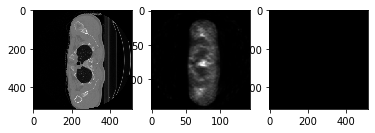

In [35]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(CT_data[:,:,50],cmap='gray')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(PET_data[:,:,50],cmap='gray')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(SEG_data[:,:,50],cmap='gray')

In [36]:
sum=SEG_data.sum(axis=0)
sum=sum.sum(axis=0)
print(sum)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  47.  93. 216. 310. 371.
 435. 469. 519. 541. 545. 536. 529. 513. 480. 461. 413. 360. 325. 270.
 226. 146.  82.  31.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [37]:
path = 'F:\\Master courses\\Praktikum\\Datasets\\Mayank\\hecktor_nii\\'

files = [f for f in glob.glob(path + "**/*_ct_gtvt.nii.gz", recursive=True)]
labels_lenght=list()
image_list=list()
label_list=list()
#resize all PET images in "z" dimension to match them with annotation images and store them in a list

for f in files:
    SEG_img = nib.load(f)
    SEG_data = SEG_img.get_fdata()
    SEG_sum=SEG_data.sum(axis=0)
    SEG_S=(SEG_sum.sum(axis=0)>0).astype(int)
    labels_lenght.append(len(SEG_S))
    label_list.append(SEG_S)
    path=f[:-15]+'_pt.nii.gz'
    im=nib.load(path)
    PET_data=im.get_fdata()
    img_stack_sm = np.zeros((PET_data.shape[0], PET_data.shape[1], len(SEG_S)))
    for idx in range(PET_data.shape[0]):
        img = PET_data[idx, :, :]
        img_sm = cv2.resize(img, (len(SEG_S),im.shape[1]), interpolation=cv2.INTER_CUBIC)
        img_stack_sm[idx, :, :] = img_sm
       
    image_list.append(img_stack_sm)


In [ ]:
#np.save('testnp.npy', image_list)
#image_list1=np.load('testnp.npy')

In [38]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import os
from skimage.io import imread
from skimage.color import gray2rgb
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torchvision as tv
from torch.utils.data import (
    Dataset,
    DataLoader,
)
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
class HN_Dataset(Dataset):
    def __init__(self, transform=tv.transforms.Compose(tv.transforms.ToTensor())):
        self.labels = label_list
        self.images=image_list
        self.transform = transform

    def __len__(self):
        return np.sum(labels_lenght)

    def __getitem__(self, idx):
       
        _sum=0
        for index,i in enumerate((labels_lenght)):
            _sum+=i
            if _sum>idx:
                this_index=np.sum(labels_lenght[:index])
                this_image=int(idx-this_index)
                break
        PET_data=self.images[index][:,:,this_image]
        PET_data = cv2.resize(PET_data, (140,140), interpolation=cv2.INTER_CUBIC)
        label= torch.as_tensor((self.labels[index][this_image]))
        
        if self.transform is not None:
            PET_data = self.transform(PET_data)
        return (PET_data, label)

In [64]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
in_channel = 1
num_classes = 2
learning_rate = 1e-3
batch_size = 32
num_epochs = 10

# Load Data
dataset = HN_Dataset( transform=tv.transforms.ToTensor())

train_set, test_set = torch.utils.data.random_split(dataset, [30000, 588])
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


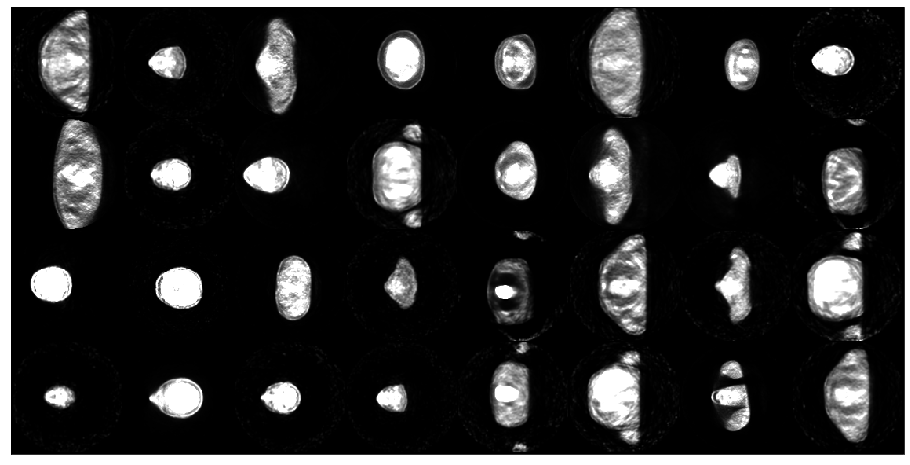

labels tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)


In [41]:

dataIter = iter(train_loader)
imgs, labels = dataIter.next()

def imshow(imgs):
    imgs = tv.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(16,16))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
imshow(imgs)
print ("labels", labels)


In [42]:
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=1):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=8,
            kernel_size=(3, 3),
            stride=(1, 1),
            padding=(1, 1),
        )
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=8,
            kernel_size=(3, 3),
            stride=(1, 1),
            padding=(1, 1),
        )
        self.fc1 = nn.Linear(8 * 35 * 35, num_classes)
        self.sig=nn.Sigmoid()
        self.initialize_weights()

        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        x=self.sig(x)
        return x

    

    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_normal_(m.weight)

                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

            elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.constant_(m.bias, 0)


In [43]:

def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)


def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])


In [65]:

# Initialize network
model = CNN().to(device)
#model = model.float()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
load_module=False
# Train Network
for epoch in range(num_epochs):
    if load_module:
        # load checkpoint
        load_checkpoint(torch.load("my_checkpoint.pth.tar"), model, optimizer)
    losses = []
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # forward
        data=data.float()
        scores = model(data)
        targets=targets.float()
        #scores=scores.float()

        loss = criterion(scores, targets)
        losses.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
    print(f"Cost at epoch {epoch} is {np.sum(losses)/len(losses)}")
    checkpoint = {"state_dict": model.state_dict(), "optimizer": optimizer.state_dict()}
    # save checkpoint
    save_checkpoint(checkpoint)


C:\Users\user\python\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
C:\Users\user\python\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Cost at epoch 0 is 0.19754288704700465
=> Saving checkpoint
Cost at epoch 1 is 0.14359623631700746
=> Saving checkpoint
Cost at epoch 2 is 0.11986767455711086
=> Saving checkpoint
Cost at epoch 3 is 0.10350317218110584
=> Saving checkpoint
Cost at epoch 4 is 0.09141540017883991
=> Saving checkpoint
Cost at epoch 5 is 0.07823391487017206
=> Saving checkpoint
Cost at epoch 6 is 0.07211396432092497
=> Saving checkpoint
Cost at epoch 7 is 0.0638347713813272
=> Saving checkpoint
Cost at epoch 8 is 0.05667625540588945
=> Saving checkpoint
Cost at epoch 9 is 0.05245428298308855
=> Saving checkpoint


Checking accuracy on Training Set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


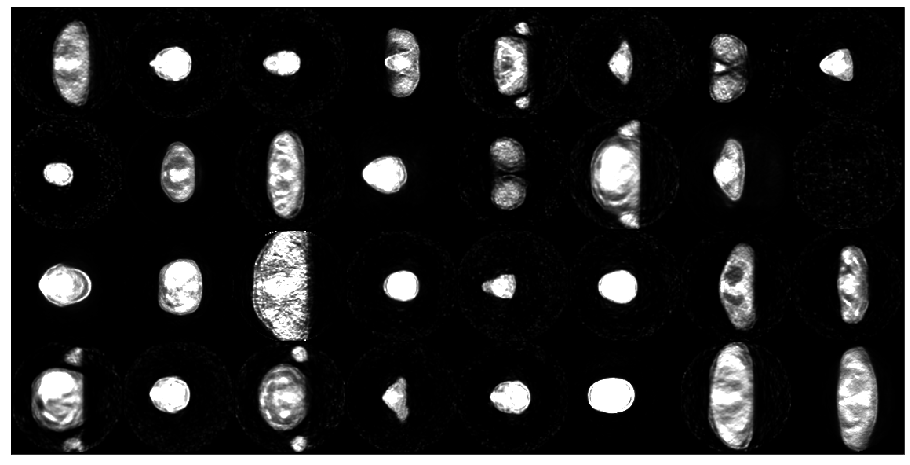

labels     : [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
predictions: [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Got 29443 / 30000 with accuracy 98.14
Checking accuracy on Test Set


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


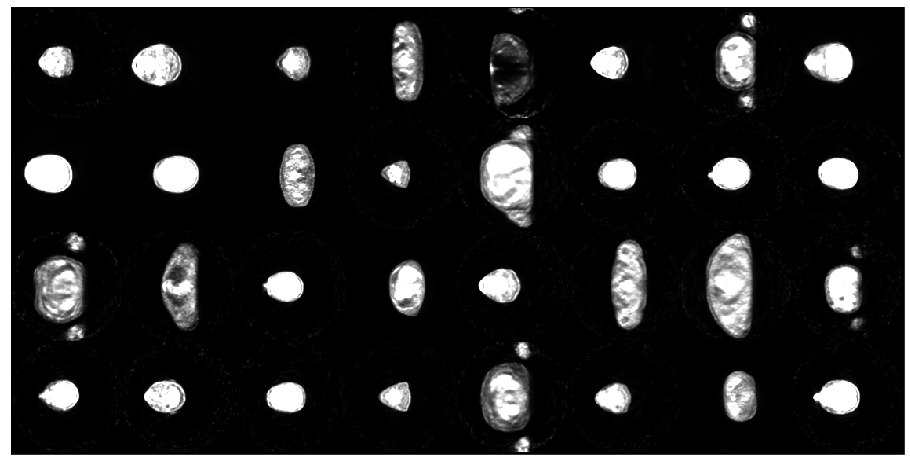

labels     : [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0]
predictions: [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
Got 572 / 588 with accuracy 97.28


In [78]:
# Check accuracy on training to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    j=0

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x=x.float()
            scores = model(x)
            predictions=torch.round(scores)
            if j ==0:
                imshow(x)
                print ("labels     :",np.ravel(y.numpy()))
                print ("predictions:",np.ravel((predictions.numpy()).astype(np.int)))
                output=scores
                np.set_printoptions(suppress=True)
                j=1

            num_correct += (predictions.view(-1) == y).sum()
            num_samples += predictions.size(0)
        
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train()


print("Checking accuracy on Training Set")
check_accuracy(train_loader, model)

print("Checking accuracy on Test Set")
check_accuracy(test_loader, model)
